In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize']=12,6

#### k-means

In [2]:
cd = pd.read_csv('clustering_data_1.csv')

In [3]:
cd.head()

,X,Y
0,-8.659655,1.344655
1,-4.765612,-8.923286
2,-8.744243,-0.576567
3,1.805738,-13.008058
4,-4.798434,-8.945116


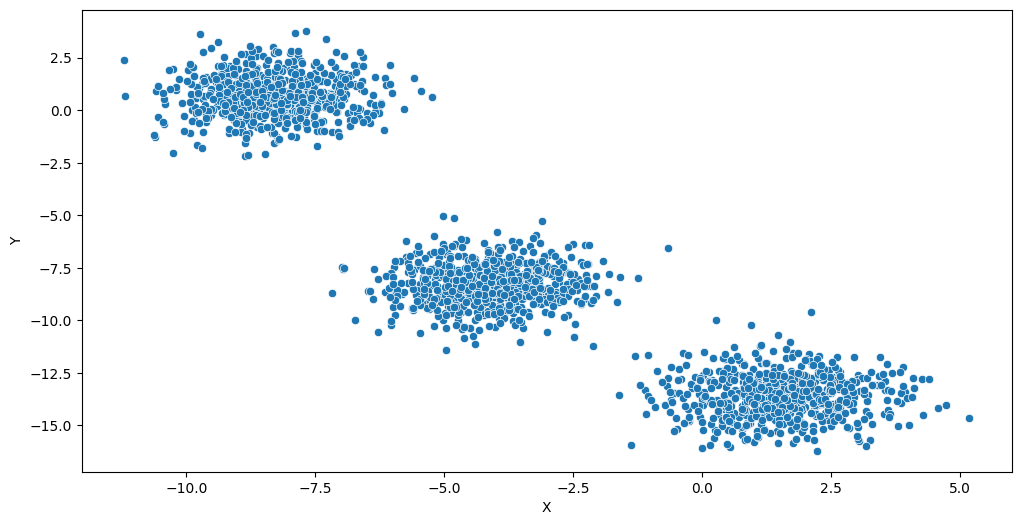

In [5]:
import warnings
warnings.filterwarnings("ignore")
sns.scatterplot(x='X',y='Y',data=cd)
plt.show()

In [6]:
Kmean=KMeans(n_clusters=2)

In [7]:
Kmean.fit(cd)

KMeans(n_clusters=2)

In [8]:
cluster_assignment=Kmean.predict(cd)

<Axes: xlabel='X', ylabel='Y'>

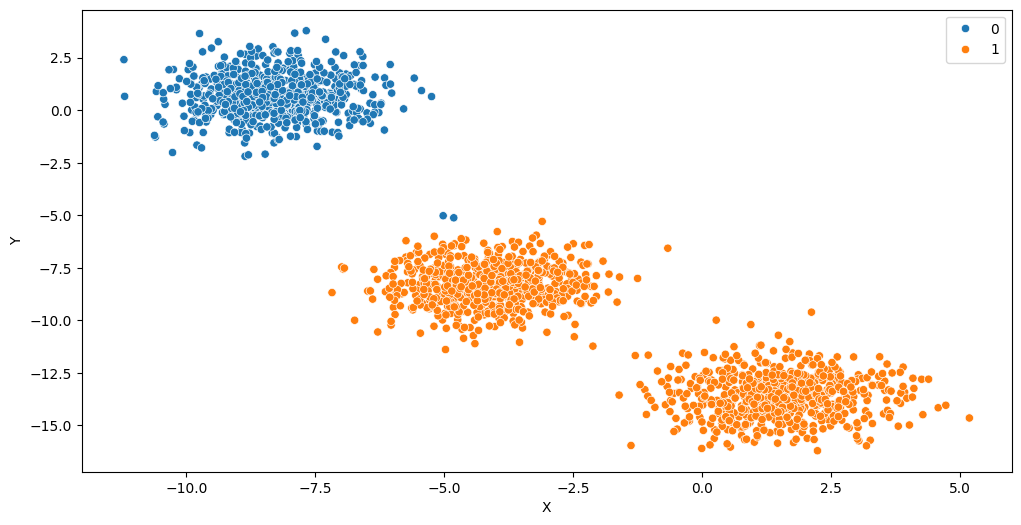

In [14]:
sns.scatterplot(x='X', y='Y', data=cd, hue=cluster_assignment)


In [15]:
Kmean=KMeans(n_clusters=3)

In [17]:
Kmean.fit(cd)

KMeans(n_clusters=3)

In [18]:
cluster_assignment=Kmean.predict(cd)

<Axes: xlabel='X', ylabel='Y'>

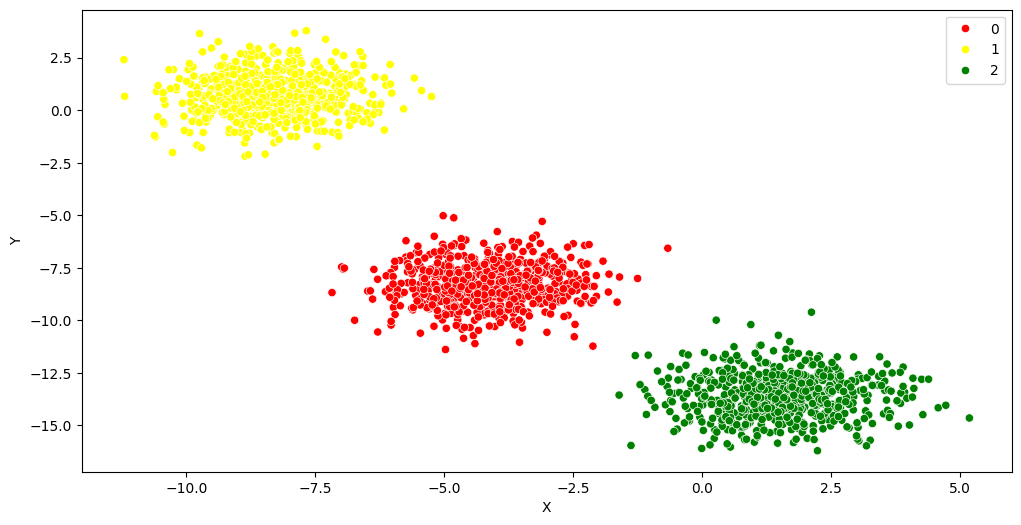

In [20]:
sns.scatterplot(x='X', y='Y', data=cd, hue=cluster_assignment,palette=['red','yellow','green'])

In [21]:
cd.head()

,X,Y
0,-8.659655,1.344655
1,-4.765612,-8.923286
2,-8.744243,-0.576567
3,1.805738,-13.008058
4,-4.798434,-8.945116


In [22]:
y_pred =  Kmean.fit_predict(cd[["X","Y"]])
y_pred

array([1, 0, 1, ..., 2, 2, 1])

In [23]:
cd['predict_cluster']=y_pred
cd.head()

,X,Y,predict_cluster
0,-8.659655,1.344655,1
1,-4.765612,-8.923286,0
2,-8.744243,-0.576567,1
3,1.805738,-13.008058,2
4,-4.798434,-8.945116,0


In [26]:
df1=cd[cd.predict_cluster==0]
df2=cd[cd.predict_cluster==1]
df3=cd[cd.predict_cluster==2]


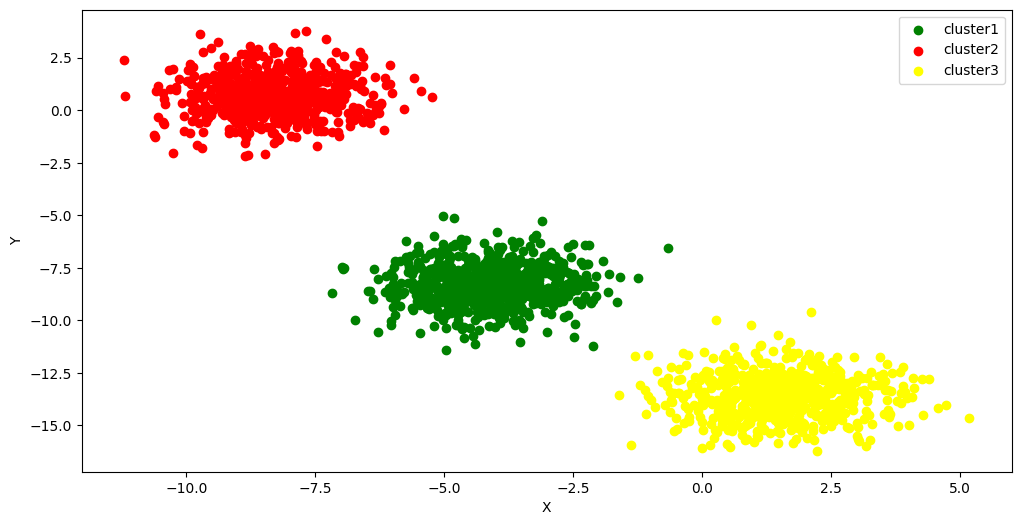

In [29]:
plt.scatter(df1.X, df1['Y'], color='green', label='cluster1')
plt.scatter(df2.X, df2['Y'], color='red', label='cluster2')
plt.scatter(df3.X, df3['Y'], color='yellow', label='cluster3')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [30]:
Kmean.cluster_centers_

array([[ -4.12693297,  -8.27316   ],
       [ -8.31217971,   0.69225267],
       [  1.52419272, -13.5935043 ]])

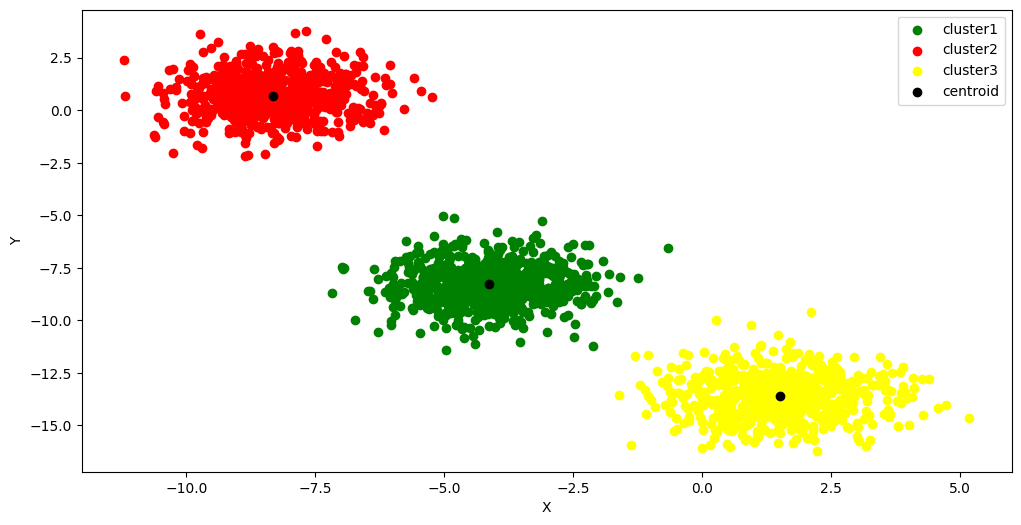

In [33]:
plt.scatter(df1.X, df1['Y'], color='green', label='cluster1')
plt.scatter(df2.X, df2['Y'], color='red', label='cluster2')
plt.scatter(df3.X, df3['Y'], color='yellow', label='cluster3')

# Correct the plotting of centroids
plt.scatter(Kmean.cluster_centers_[:, 0], Kmean.cluster_centers_[:, 1], color='black', marker='o', label='centroid')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [34]:
import scikitplot as skplt

In [36]:
kmeans_elbow=KMeans()

<Axes: title={'center': 'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

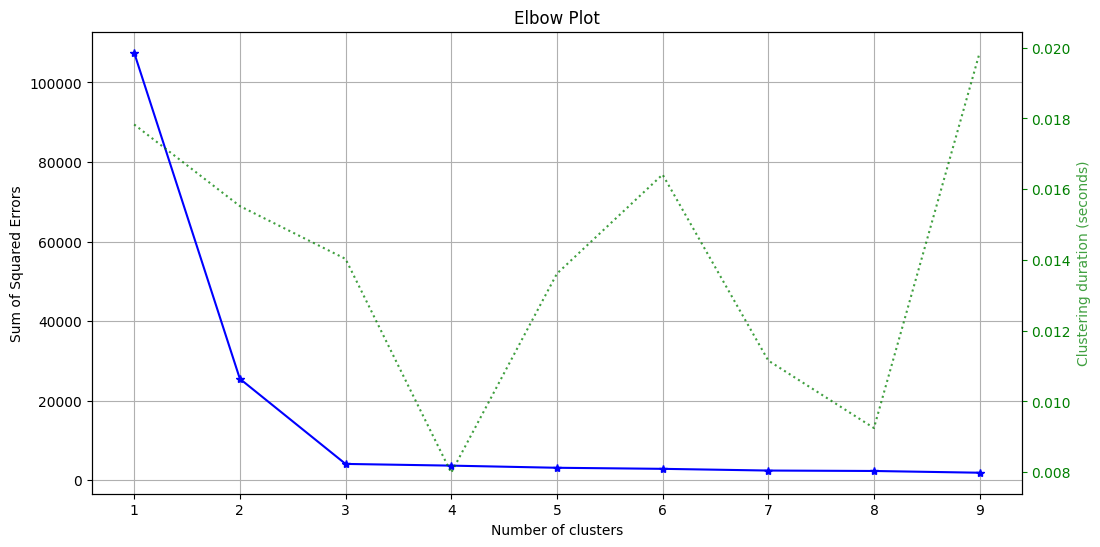

In [37]:
skplt.cluster.plot_elbow_curve(kmeans_elbow,X=cd,cluster_ranges=range(1,10))

In [38]:
cd2=pd.read_csv('clustering_data_2.csv')

In [39]:
cd2.head()

,X,Y
0,-0.472231,0.036999
1,-0.160415,-0.448140
2,-0.521661,0.904800
3,-0.986056,-0.347668
4,-0.068556,0.986253


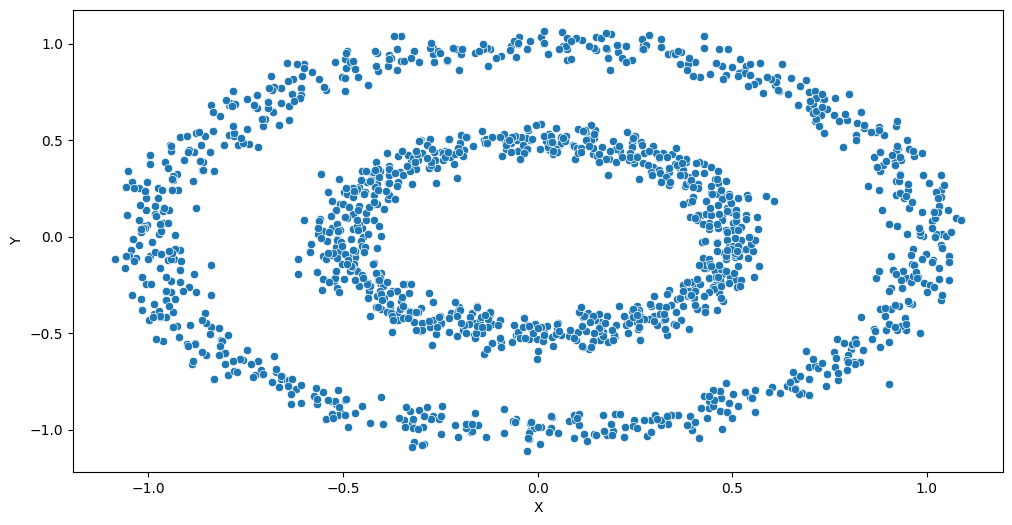

In [40]:
import warnings
warnings.filterwarnings("ignore")
sns.scatterplot(x='X',y='Y',data=cd2)
plt.show()

In [41]:
Kmean=KMeans(n_clusters=2)

In [42]:

Kmean.fit(cd)

KMeans(n_clusters=2)

In [52]:
cluster_assignment = cluster_assignment[:len(cd2)]


In [53]:
print(len(cd2), len(cluster_assignment))  # Ensure both lengths match


1500 1500


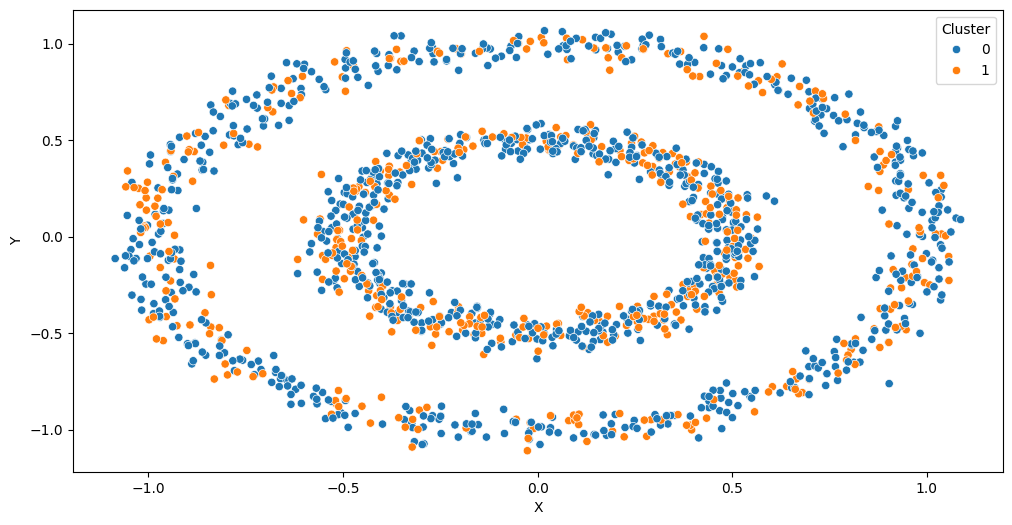

In [54]:
# Ensure the lengths of cd2 and cluster_assignment match
if len(cluster_assignment) != len(cd2):
    cluster_assignment = cluster_assignment[:len(cd2)]  # Trim to match cd2 length

# Now plot
sns.scatterplot(x=cd2['X'], y=cd2['Y'], hue=cluster_assignment)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Cluster')
plt.show()
